# Different example
$$\min_x c^Tx-\sum_{i=1}^m\log(b_i-a_i^T x)$$

In [108]:
# Set the seed
# np.random.seed()
import numpy as np
from functions import *
m = 500
n = 100

A = np.random.randn(m, n)
x0 = np.random.random(n)
b = A.dot(x0)+1
c = np.random.randn(n)

f = lambda x: c.dot(x)-np.sum(np.log(b-A.dot(x)))
grad_f = lambda x: c+A.T.dot(1/(b-A.dot(x)))
nabla_f = lambda x: A.T.dot(np.diag(1/(b-A.dot(x))**2)).dot(A)

decrement = lambda dx, x: (dx.dot(nabla_f(x).dot(dx)))**2/2
dom_f = lambda x: np.all(b-A.dot(x)>0)


In [109]:
x_n, v_n = newton(f, grad_f, nabla_f, x0, A=A, b=b, dom_f=dom_f, MAXITERS=100, TOL=1e-8,alpha = 0.0001, beta = 0.5, print_iter=True, eq=False, N=1)

Iteration: 1, decrement: 46.2795335038
Iteration: 2, decrement: 20.1476372775
Iteration: 3, decrement: 1.2506454020
Iteration: 4, decrement: 0.2172685720
Iteration: 5, decrement: 0.0300012381
Iteration: 6, decrement: 0.0006080105
Iteration: 7, decrement: 0.0000002514
Iteration: 8, decrement: 0.0000000000


In [110]:
x_q, v_q = quasi_newton(f, grad_f, x0, A=A, b=b, dom_f=dom_f, MAXITERS=1000, TOL=1e-8, alpha = 0.0001, beta = 0.5, print_iter=False,N=1)

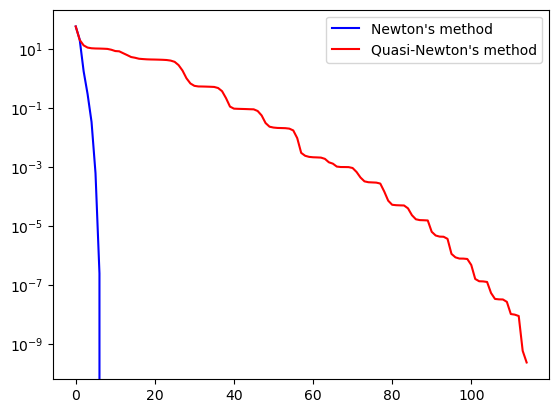

In [111]:
plot_error_iter(x_n, v_n, v_n[-1], "Newton's method")
plot_error_iter(x_q, v_q, v_n[-1], "Quasi-Newton's method",color='red')
plt.legend()

In [116]:
import numpy as np
from scipy.optimize import line_search
dom_f = lambda x: np.all(b-A.dot(x)>0)
def lbfgs(f, grad_f, x0, M=10, max_iters=100, tolerance=1e-8, alpha=1e-4, beta=0.9):
    n = len(x0)
    x = x0.copy()
    grad = grad_f(x)
    obj = f(x)
    grad_norm = np.linalg.norm(grad)
    step_size = 1.0
    
    s_list = []
    y_list = []
    rho_list = []
    
    for _ in range(max_iters):
        print(grad_norm)
        if grad_norm < tolerance:
            
            break

        p = -grad
        if len(s_list) > 0:
            q = p.copy()
            alphas = []
            
            for s, y, rho in zip(s_list[::-1], y_list[::-1], rho_list[::-1]):
                alpha = rho * np.dot(s, q)
                q -= alpha * y
                alphas.append(alpha)
            
            r = step_size * q
            
            for s, y, rho, alpha in zip(s_list, y_list, rho_list, alphas[::-1]):
                beta = rho * np.dot(y, r)
                r += (alpha - beta) * s
            
            p = r
        
        step_size = 1
        while not dom_f(x + step_size*p):
            step_size *= beta
        # Backtracking line search.
        while f(x + step_size*p) > f(x) - alpha * step_size * grad_norm:
            step_size *= beta
        x += step_size * p
        new_grad = grad_f(x)
        
        if step_size < tolerance:
            break
        
        s = step_size * p
        y = new_grad - grad
        rho = 1.0 / np.dot(y, s)
        
        if np.isinf(rho):
            break
        
        s_list.append(s)
        y_list.append(y)
        rho_list.append(rho)
        
        if len(s_list) > M:
            s_list.pop(0)
            y_list.pop(0)
            rho_list.pop(0)
        
        grad = new_grad
        obj = f(x)
        grad_norm = np.linalg.norm(grad)
    
    return x


In [117]:
x = lbfgs(f, grad_f, x0, M=10, max_iters=100, tolerance=1e-8, alpha=1e-4, beta=0.9)

229.66023617512428


NameError: name 'dx' is not defined